### Learning Interactive Dashboard in Jupyter
Finding size of twitter circles through interactive dashboards

In [161]:
import ipywidgets as widgets
from IPython.display import display
import tweepy
import json
import requests
import time
import operator
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np

------------------------------------------

#### Playing with *ipywidgets*

In [2]:
# Text Box
text = widgets.Text(description='Enter Username', width=50)
display(text)

def textbox_value(sender):
    print(text.value)
    
text.on_submit(textbox_value)

In [3]:
# Checkboxes
checkboxes = ['Twitter', 'Instagram', 'Facebook']
items = [widgets.Checkbox(description=sn) for sn in checkboxes]
cb_container = widgets.HBox(items)
display(cb_container)

In [4]:
# Slider
slider = widgets.IntSlider(description='Group Size')
display(slider)

In [5]:
# Form example
form_item_layout = widgets.Layout(
    display='flex',
    flex_flow='row',
    jusify_content='space-between'
)

form_items = [
    widgets.Box([widgets.Label(value='Name'), widgets.Text()], layout=form_item_layout),
    widgets.Box([widgets.Label(value='Team'), widgets.Dropdown(options=['Valor', 'Mystique', 'Instinct'])]),
    widgets.Box([widgets.Label(value='Information'), widgets.Textarea()])
]

form = widgets.Box(
    form_items,
    layout=widgets.Layout(
        display='flex', flex_flow='column', border='solid 1px', align_items='stretch', width='50%'
    )
)

display(form)

-------------------------------------------

#### Learning Twitter API with Tweepy

In [6]:
# Loading API Tokens
secrets_file = 'secret_keys.txt'
api_keys = dict()
with open(secrets_file, 'r') as f:
    api_keys = json.loads(f.read())

In [7]:
# Connecting to Twitter API with Key and Access Token
twitter_auth = tweepy.OAuthHandler(api_keys['TWITTER_KEY'], api_keys['TWITTER_SECRET'])
twitter_auth.set_access_token(api_keys['TWITTER_ACCESS_TOKEN'], api_keys['TWITTER_ACCESS_TOKEN_SECRET'])
twitter_api = tweepy.API(twitter_auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
# Getting Twitter profile by User name
twitter_username = 'jack' #'aditya_shirode'
twitter_profile = twitter_api.get_user(twitter_username)
print(twitter_profile.screen_name, twitter_profile.followers_count)

jack 4072410


In [ ]:
# Attributes in Twitter Profile
twitter_profile._json.keys()

In [9]:
# Getting list of 'friends'
def get_friends():
    user_set = set()
    while True:
        try:
            for page in tweepy.Cursor(twitter_api.friends, screen_name='aditya_shirode').pages():
                time.sleep(60)
                for user in twitter_api.lookup_users(page):
                    user_set.add(user.screen_name)
        except (tweepy.TweepError, tweepy.RateLimitError):
            time.sleep(60*15)
        except StopIteration:
            break

In [33]:
possible_keywords = ['NCState', 'NC State', 'NCSU', 'North Carolina State']
possible_keywords.extend([uname.lower() for uname in possible_unames])

In [40]:
data = set()

PAGE_LIMIT = 20
try:
    for i in range(1,PAGE_LIMIT+1):
        print('Iteration {}\t'.format(i), end='')
        for user in twitter_api.search_users('NC State', per_page=20, page=i):
            u_handle, u_desc, u_name = user.screen_name, user.description, user.name
            for keyword in possible_keywords:
                if keyword in u_name or keyword in u_name:
                    data.add((user.screen_name, user.followers_count))
            if 'Official' in u_desc and 'NC State' in u_desc:
                data.add((user.screen_name, user.followers_count))
        # time.sleep(60)
except tweepy.RateLimitError:
    time.sleep(60)

Iteration 1	Iteration 2	Iteration 3	Iteration 4	Iteration 5	Iteration 6	Iteration 7	Iteration 8	Iteration 9	Iteration 10	Iteration 11	Iteration 12	Iteration 13	Iteration 14	Iteration 15	Iteration 16	Iteration 17	Iteration 18	Iteration 19	Iteration 20	

In [71]:
top_20 = OrderedDict(sorted(dict(data).items(), key=operator.itemgetter(1))[-20:])

In [72]:
top_20

OrderedDict([('NCStateUREC', 5259),
             ('PackMensSoccer', 5848),
             ('NCStateEngr', 6190),
             ('NCStateIsMyLife', 6555),
             ('PackVball', 6710),
             ('PNCArena', 6999),
             ('PackSoftball', 7023),
             ('PackWomensBball', 7815),
             ('NCStateStores', 7885),
             ('NCExtension', 8733),
             ('PackWrestle', 10157),
             ('NCparks', 10318),
             ('wolfpackclub', 14140),
             ('NCStateAlumni', 14238),
             ('NCStateNews', 26259),
             ('StateCoachD', 34151),
             ('PackAthletics', 72133),
             ('PackMensBball', 78593),
             ('NCState', 95307),
             ('PackFootball', 105066)])

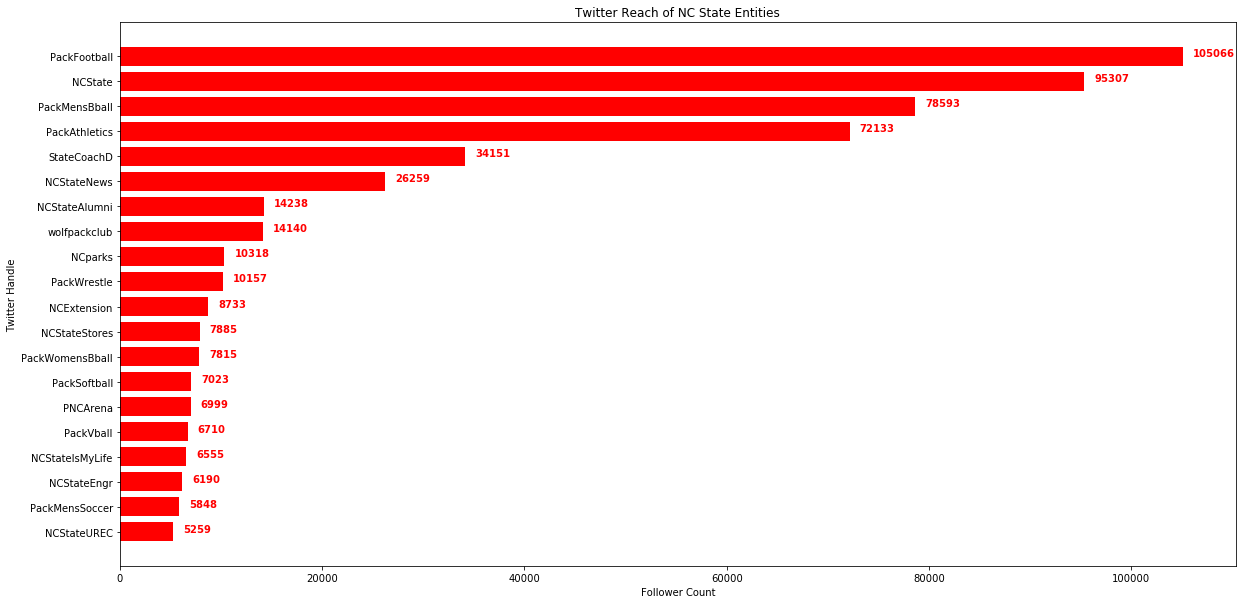

In [93]:
fig, ax = plt.subplots(figsize=(20, 10))
width = 0.75
ax.barh(range(20), top_20.values(), width, color='r')
ax.set_ylabel('Twitter Handle')
ax.set_xlabel('Follower Count')
ax.set_yticklabels(top_20.keys())
ax.set_yticks(range(20))
for i, v in enumerate(top_20.values()):
    ax.text(v+1000, i, str(v), color='red', fontweight='bold')
plt.title('Twitter Reach of NC State Entities')
plt.show()

----------

#### Designing Interactive App
Enter two Twitter user names (@handle) and compare the follower counts

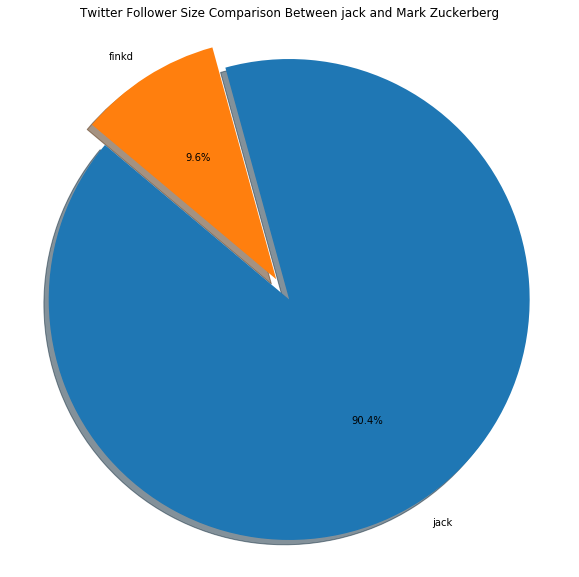

In [181]:
user1_name = widgets.Text(width=20)
button1 = widgets.Button(description='Enter User 1')
user1 = widgets.HBox([user1_name, button1])
display(user1)

user2_name = widgets.Text(description='', width=20)
button2 = widgets.Button(description='Enter User 2')
user2 = widgets.HBox([user2_name, button2])
display(user2)

follower_count = [None, None]

def on_user_submit(entry):
    twitter_username = entry.value
    try:
        twitter_profile = twitter_api.get_user(twitter_username)
        return (twitter_profile.screen_name, twitter_profile.followers_count, twitter_profile.name)
    except tweepy.TweepError:
        print('User Not Found')

def on_user_submit_button1(sender):
    follower_count[0] = on_user_submit(user1_name)
    
def on_user_submit_button2(sender):
    follower_count[1] = on_user_submit(user2_name)
    draw_pie_chart(follower_count)
    
button1.on_click(on_user_submit_button1)
button2.on_click(on_user_submit_button2)

def draw_pie_chart(follower_count):
    follower_count.sort(reverse=True)
    data = np.array(follower_count)
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.pie(data[:,1], explode=(0.1,0), labels=data[:,0], autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Twitter Follower Size Comparison Between {} and {}'.format(*data[:,2]))
    plt.axis('equal')
    plt.show()
